In [30]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from numpy import pi, random

In [31]:
def chsh_game(strategy):
    # Choose x and y randomly
    x, y = random.randint(0, 2), random.randint(0, 2)

    a, b = strategy(x, y)

    if (a != b) == (x & y): return 1  # Win
    else: return 0  # Lose

In [32]:
def chsh_circuit(x, y):
    qc = QuantumCircuit(2, 2)

    # Prepare an e-bit
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice's actions
    if x == 0: qc.ry(0, 0)
    else: qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob's actions
    if y == 0: qc.ry(-pi / 4, 1)
    else: qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

(x,y) = (0,0)


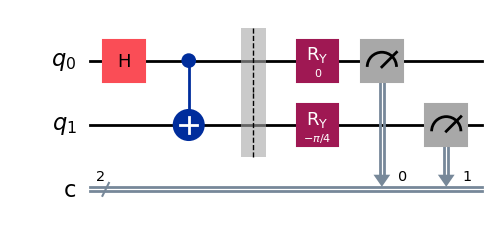

(x,y) = (0,1)


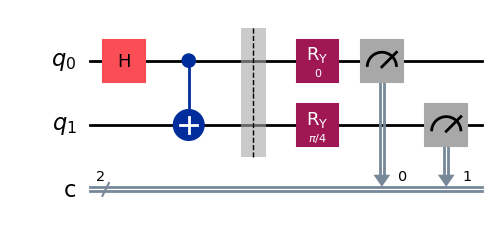

(x,y) = (1,0)


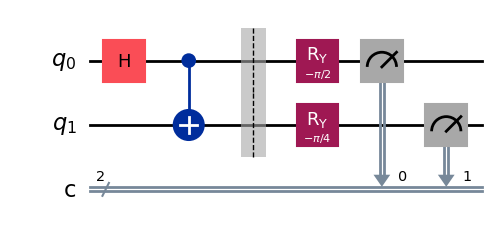

(x,y) = (1,1)


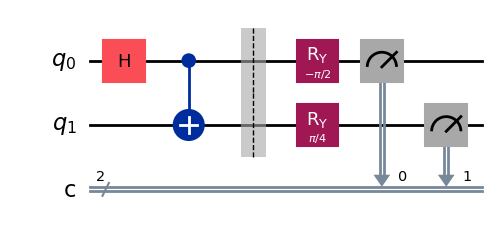

In [33]:
# Draw the four possible circuits
print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

In [34]:
def quantum_strategy(x, y):
    result = AerSimulator().run(chsh_circuit(x, y), shots=1).result()
    statistics = result.get_counts()

    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [35]:
def classical_strategy(x, y):
    # Alice's answer
    if x == 0:   a = 0
    elif x == 1: a = 1

    # Bob's answer
    if y == 0:   b = 1
    elif y == 1: b = 0

    return a, b

In [36]:
N = 1000
QUANTUM_SCORE = 0
CLASSICAL_SCORE = 0

for _ in range(N):
    QUANTUM_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won using quantum strategy", QUANTUM_SCORE / N)

for _ in range(N):
    CLASSICAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won using classical strategy", CLASSICAL_SCORE / N)

Fraction of games won using quantum strategy 0.83
Fraction of games won using classical strategy 0.766
